<a href="https://colab.research.google.com/github/me-oniichan/Digit-Classification/blob/main/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
data = pd.read_csv("sample_data/mnist_train_small.csv").to_numpy(dtype = np.float32)

In [12]:
data.dtype

dtype('float32')

In [14]:
data

array([[5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
 np.random.shuffle(data)

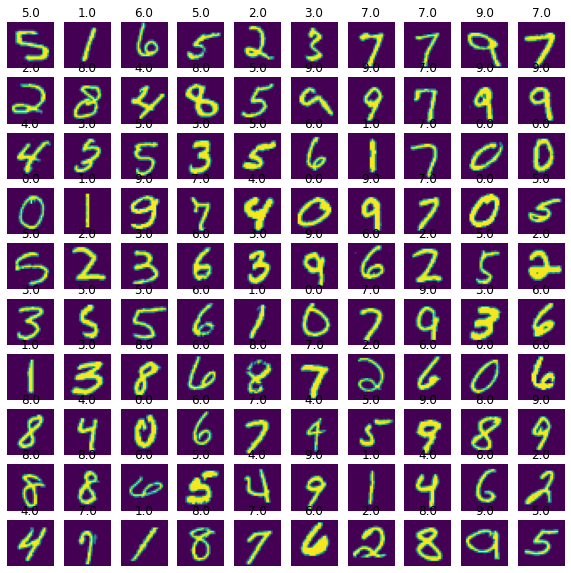

In [21]:
#display some iamges
plot = plt.figure(figsize=(10, 10))
for img in range(100):
  plot.add_subplot(10, 10, img+1)
  plt.imshow(np.reshape(data[img, 1:], (28, 28)))
  plt.axis('off')
  plt.title(f'{data[img,0]}')
plt.show()

In [19]:
train_set = data[0:15000, 1:]
train_label = np.zeros([15000, 10])
train_label[np.arange(15000), data [0:15000, 0].astype("int32")] = 1
validation_set = data[15000:, 1:]
validation_label = np.zeros([4999, 10])
validation_label[np.arange(4999), data[15000:, 0].astype("int32")] = 1

In [20]:
train_set/=255.0
validation_set/=255.0

In [53]:
model = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (784,)),
          tf.keras.layers.Dense(128, activation= tf.nn.relu),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [60]:
model.compile(optimizer = "adam", loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

In [61]:
model.fit(train_set, train_label, epochs=10)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0201 - accuracy: 0.8702
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0099 - accuracy: 0.9373
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9541
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9652
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 0.9739
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 0.9784
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 0.9835
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0026 - accuracy: 0.9862
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9888
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 0.9901

In [62]:
pred = model.evaluate(validation_set, validation_label)

157/157 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9636


In [63]:
predictions = model.predict(validation_set[:100])

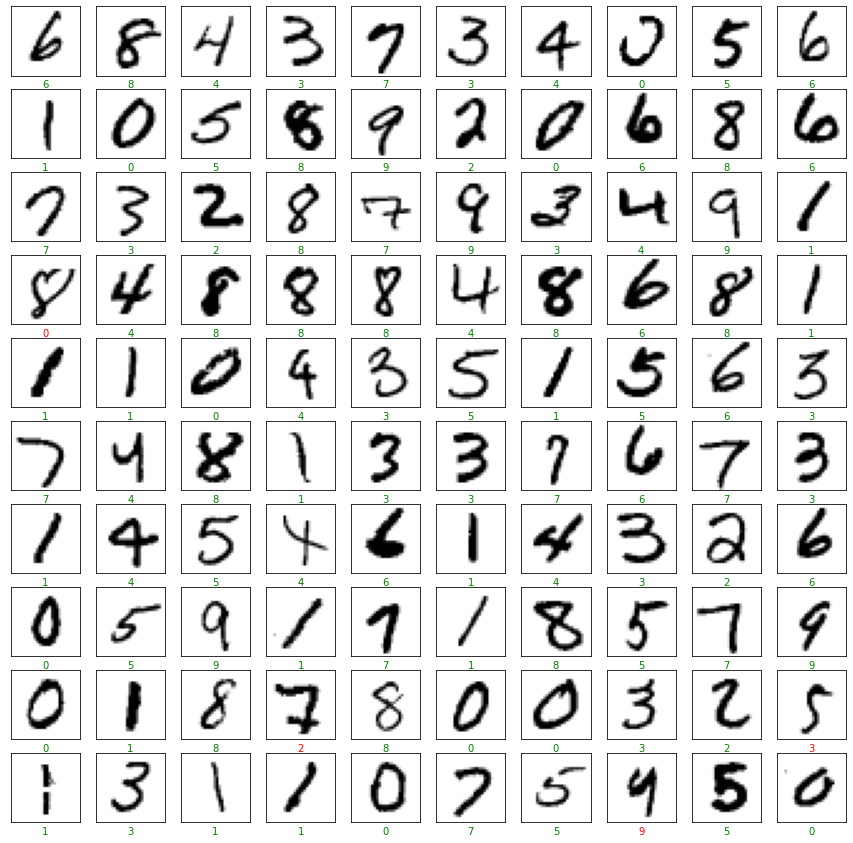

In [64]:
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(validation_set[i], (28,28)), cmap=plt.cm.binary)
    if predictions[i].argmax() == validation_label[i].argmax(): color= "green"
    else: color = "red"
    plt.xlabel(f"{predictions[i].argmax()}", color = color)
plt.show()

In [67]:
test_data = pd.read_csv("sample_data/mnist_test.csv").to_numpy(dtype = np.float32)

In [68]:
test_data.shape

(9999, 785)

In [74]:
test_set = test_data[:, 1:]
test_label = np.zeros([9999, 10])
test_label[np.arange(9999), test_data [:, 0].astype("int32")] = 1
test_set/=255.0

In [75]:
ev = model.evaluate(test_set, test_label);

313/313 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9673


In [76]:
model.save("params.h5")